# The General Information

In [1]:
import pandas as pd
import numpy as np
games = pd.read_csv('/datasets/games.csv')
display(games.head())
display(games.tail())
display(games.sample(5))
print(games.shape)
print()
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15301,Iron Phoenix,XB,2005.0,Fighting,0.02,0.00,0.00,0.00,58.0,6.5,T
7881,Princess Maker: Yumemiru Yosei,PS,1997.0,Strategy,0.00,0.00,0.18,0.01,NaN,NaN,NaN
5111,Dragonfire,2600,1981.0,Action,0.35,0.02,0.00,0.00,NaN,NaN,NaN
5136,Overlord: Dark Legend,Wii,2009.0,Action,0.11,0.22,0.00,0.04,68.0,7.9,T
13372,Chocobo to Mahou no Ehon: Majo to Shoujo to 5-...,DS,2008.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN


(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid #vbd300; 4px; padding: 20px">
We have historical data on game sales scrapped from open sources. There are 16715 entries and 11 parameters. This data set is quite informative, we see a critical amount of missing values only in scores and ratings.      
</div>

In [2]:
display(games.describe())
display(games.describe(include = ['object']))

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


<div style="border:solid #vbd300; 4px; padding: 20px">
Here we see statistics for our quantitative and qualitative variables. Obviously, the data types are often incorrect, we will change them later. Besides this fact, we see that Sales in all regions and in total have huge outliers and many nulls. The latter ones we treat as that a game was not released in this region.  

</div>

# Preprocessing

In [3]:
#print(games.columns)
new_columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']

for i in range(len(new_columns)):
    new_columns[i] = new_columns[i].lower()

games.set_axis(new_columns, axis='columns', inplace=True)

In [4]:
#display(games[games['year_of_release'].isna()])
games.dropna(subset = ['year_of_release'], inplace=True)
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = pd.DatetimeIndex(games['year_of_release']).year
games['year_of_release'] = games['year_of_release'].astype('int')    
#print(games.info())
#print(games['year_of_release'].value_counts())


In [5]:
#print(games['critic_score'].unique())
games['critic_score'].fillna(games.groupby(['genre'])['critic_score'].transform('mean'), inplace = True)
#print(games.query('critic_score == "NaN"'))
print(games['critic_score'].isna().sum())
#print(games.query('critic_score == "NaN"'))
print()

2



In [6]:
#print(games['user_score'].unique())
display(games.query('user_score == "tbd"'))
games['user_score'] = games['user_score'].replace('tbd', 'NaN')
games['user_score'] = games['user_score'].astype('float')
#games.info()
#games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,71.993133,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.000000,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,71.993133,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.000000,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,66.648330,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.000000,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.000000,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.000000,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,68.609195,tbd,E


In [7]:
#print(games['rating'].unique())
#print(games.query('rating == "RP"'))
games['rating'] = games['rating'].fillna('RP')


In [13]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.124490,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.655267,NaN,RP,31.38


<div style="border:solid #vbd300; 4px; padding: 20px">
Here we 
    
    - changed the columns' names, 
    
    - changed a type of the Year of Release column to "Integer", 
    
    - filled n\a values in the Critic Score column with an average critic score for each genre, 
    
    - changed a type of the User Score column from "Object" to "Float" and (to do this we) replaced values 'tbd' to    'nan',
    
    - filled missing values in the Rating column with "RP" (which technically has the same meaning),
    
    - created the Total Sales column.

</div>

## Review

```diff
+ Good start. I'm not sure about filling Critic Score with median, but OK.
```

---

# How many games were released in different years

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
games_by_years = games[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()
#display(games_by_years)

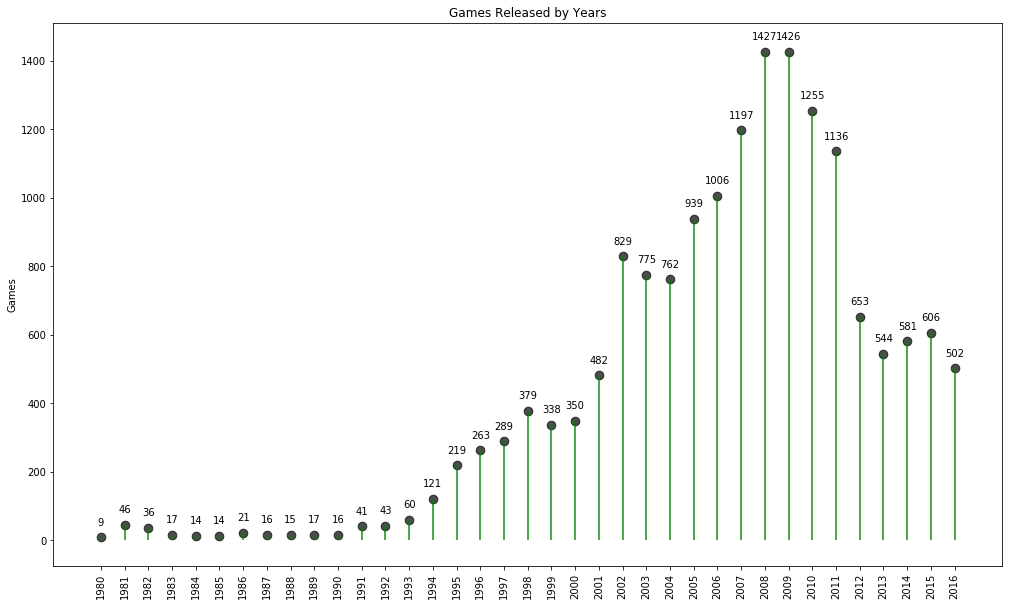

In [16]:
fig,ax = plt.subplots(figsize=(17,10))
ax.vlines(x=games_by_years.year_of_release, ymin=0, ymax=games_by_years.name, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=games_by_years.year_of_release,y=games_by_years.name, s=75, color='black', alpha=0.7)
ax.set_title('Games Released by Years')
ax.set_ylabel('Games')
ax.set_xticks(games_by_years.year_of_release)
ax.set_xticklabels(games_by_years.year_of_release, rotation=90)

for row in games_by_years.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name, 2), horizontalalignment = 'center', verticalalignment ='bottom')

<div style="border:solid #vbd300; 4px; padding: 20px">
 Here we see how many games were released every year. We see a significant shift in 2002, so later we will use this year as a starting point. 2008-2009 are the most fruitful years. There is almost the same number of released games in 2016 as in 2001, however, we suggest that the general situations are different. As we saw above, there are not so many games that bring a lot of money, and it seems that now developers concentrate on high-quality potentially profitable products.   
    
</div>

## Review

```diff
+ Nice plot. Very informative.
```

---

# How sales varied from platform to platform 

In [18]:
sales_by_platform = games[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
sales_by_platform['z_score'] = (sales_by_platform['total_sales'] - sales_by_platform['total_sales'].mean())/ sales_by_platform['total_sales'].std()
sales_by_platform['colors'] = ['red' if x < 0 else 'green' for x in sales_by_platform['z_score']]
#display(sales_by_platform)


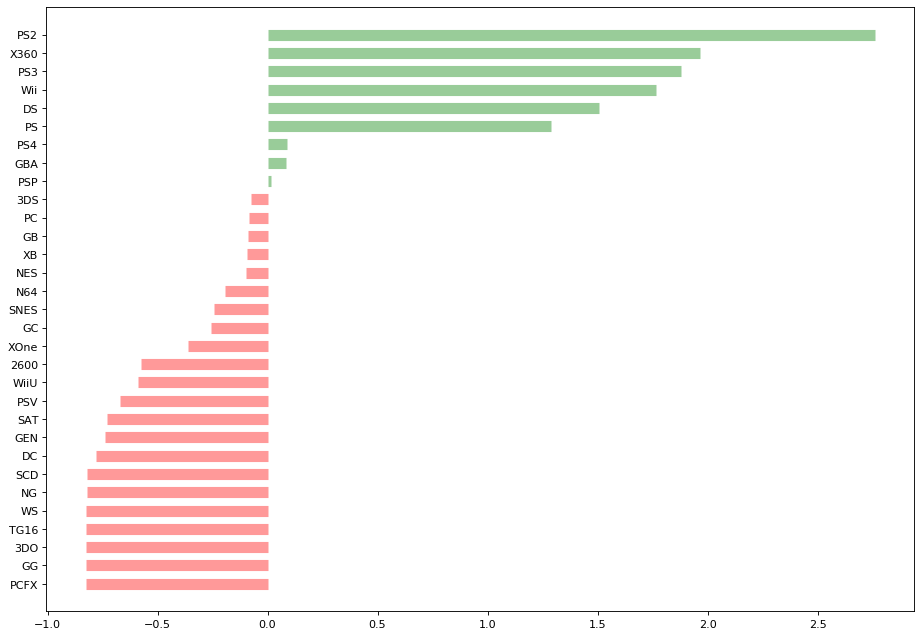

In [19]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=sales_by_platform.platform, xmin=0, xmax=sales_by_platform.z_score, color=sales_by_platform.colors,alpha= 0.4, linewidth=10)

<div style="border:solid  #vbd300; 4px; padding: 20px">
Here we calculated the Standard Scores for each platform and showed how sales varied from the average. We found 9 platforms with positive scores, we are going to use them as top platforms in sales later.   
    
</div>

# The platforms with the greatest total sales


In [20]:
print(sales_by_platform.platform.values.tolist()[-9:])
top_platforms = games[games['platform'].isin(sales_by_platform.platform.values.tolist()[-9:])]
top_platforms.drop(['name', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], axis='columns', inplace=True)

#top_platforms

['PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


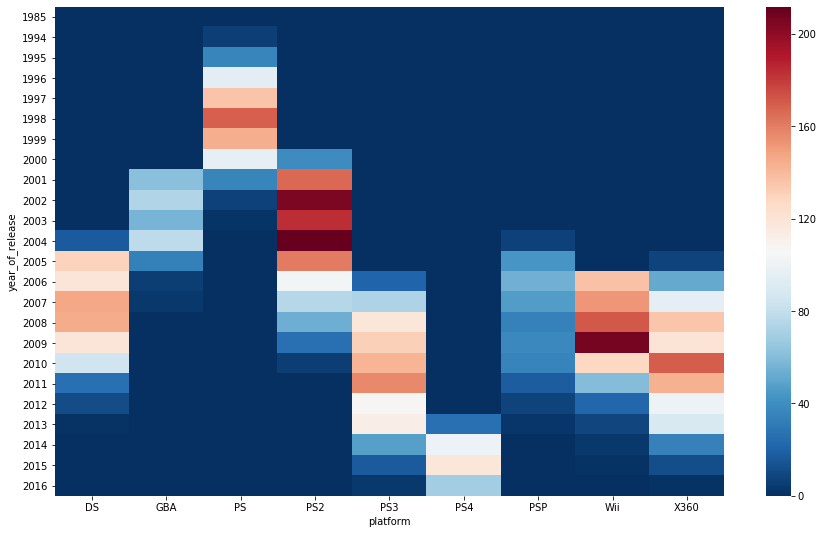

In [21]:
top_platforms_pivot = top_platforms.pivot_table(index='platform', columns = 'year_of_release', values= 'total_sales', aggfunc = 'sum', fill_value=0)
plt.figure(figsize=(15,9))
sns.heatmap(top_platforms_pivot.T, cmap = "RdBu_r")         

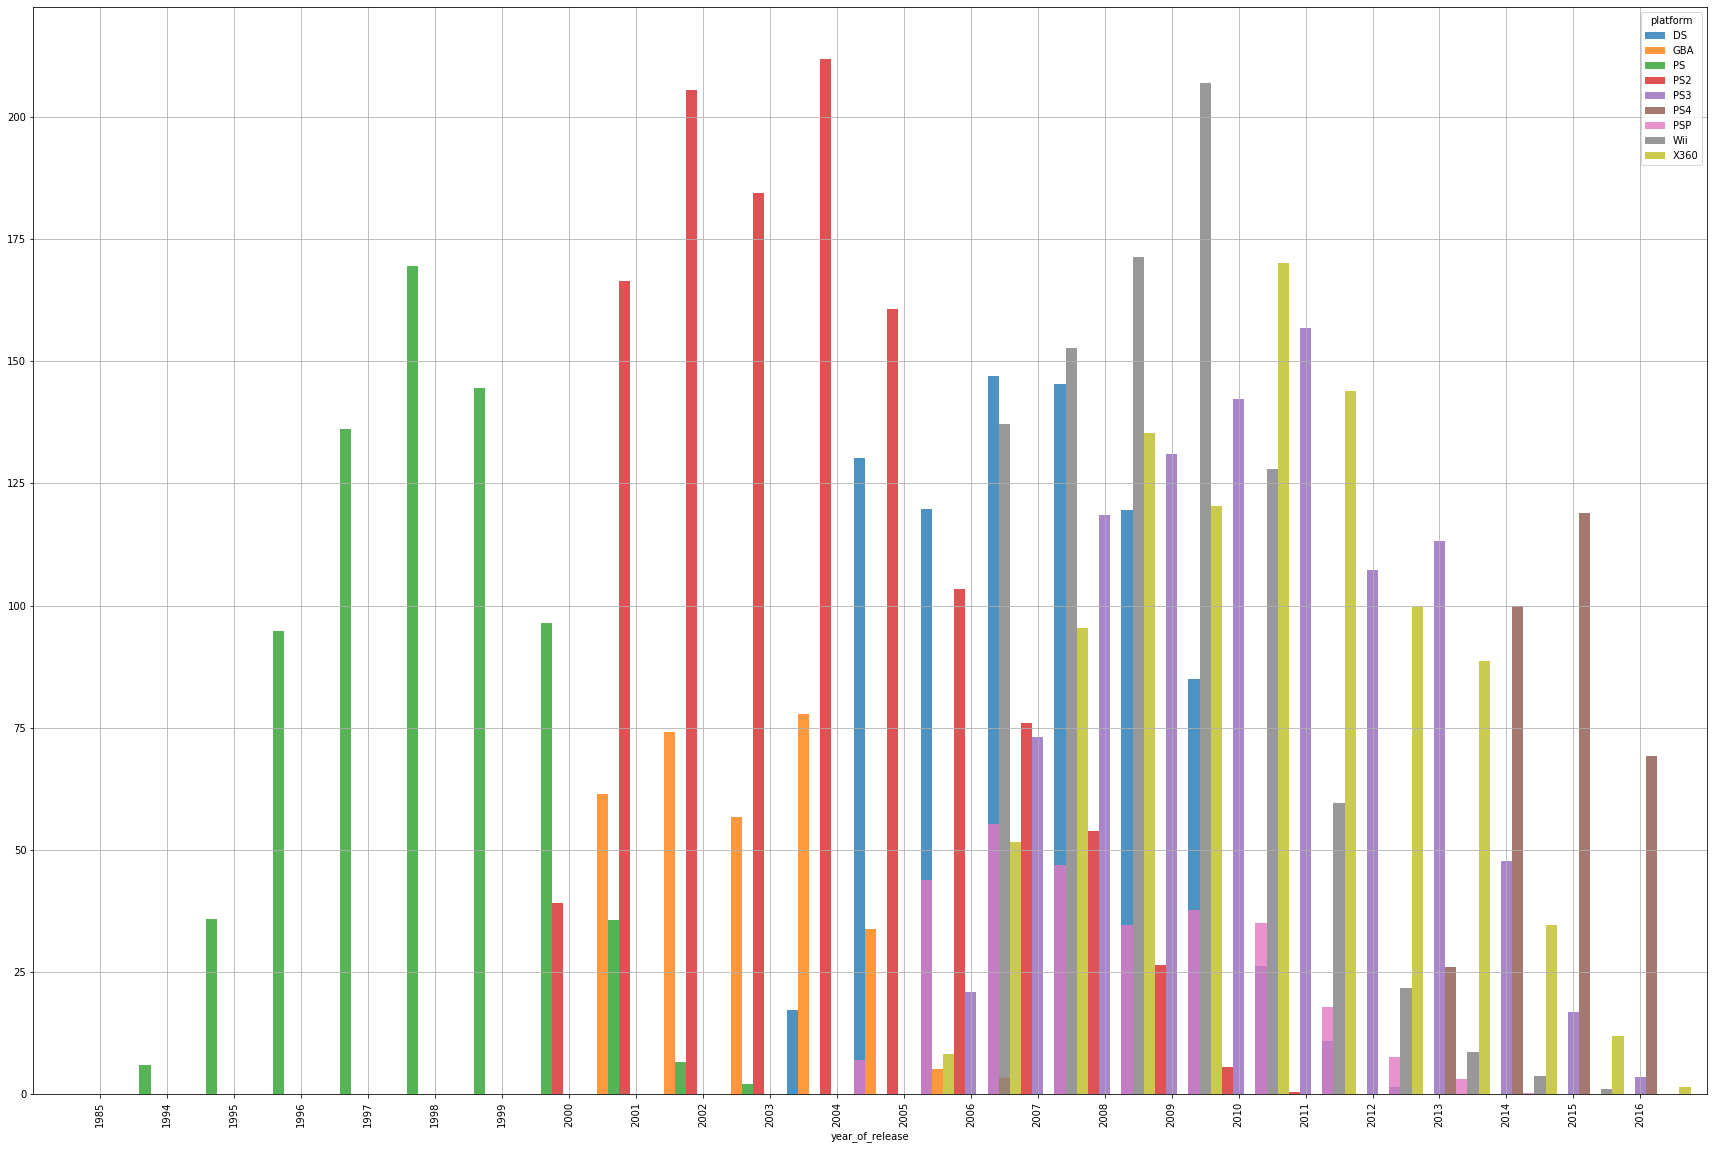

In [22]:
top_platforms_pivot.T.plot(figsize=(30, 20), width = 1.5, alpha = 0.8, grid = True, kind = 'bar')

<div style="border:solid #vbd300; 4px; padding: 20px">
We took top-9 platforms with positive z-scores and build two graphs. 

The first one is a heatmap showing the dynamic of sales after a release of each platform. According to it, we can expect some sales from PS4, but as for top-9 by total sales, that's it. 
    
The second one helps us to find platforms that used to be popular but now have zero sales -- PS, PS2, GBA, DS, PSP, PS3. It seems that their lifetime is about 10 years at best, in the decade 2001-2011 new big platforms appeared almost every year. But it's not the case anymore. 
    
Let's have a look at all platforms starting from 2001 to find potentially profitable ones. 
    
</div>

# Which platforms are leading in sales? 

In [23]:
import seaborn as sns
!pip install squarify
import squarify

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## Review

It looks like you imported seaborn again :)
    
---

,platform,total_sales
15,DS,802.76
16,Wii,891.18
17,PS3,931.34
18,X360,961.24
19,PS2,1194.39


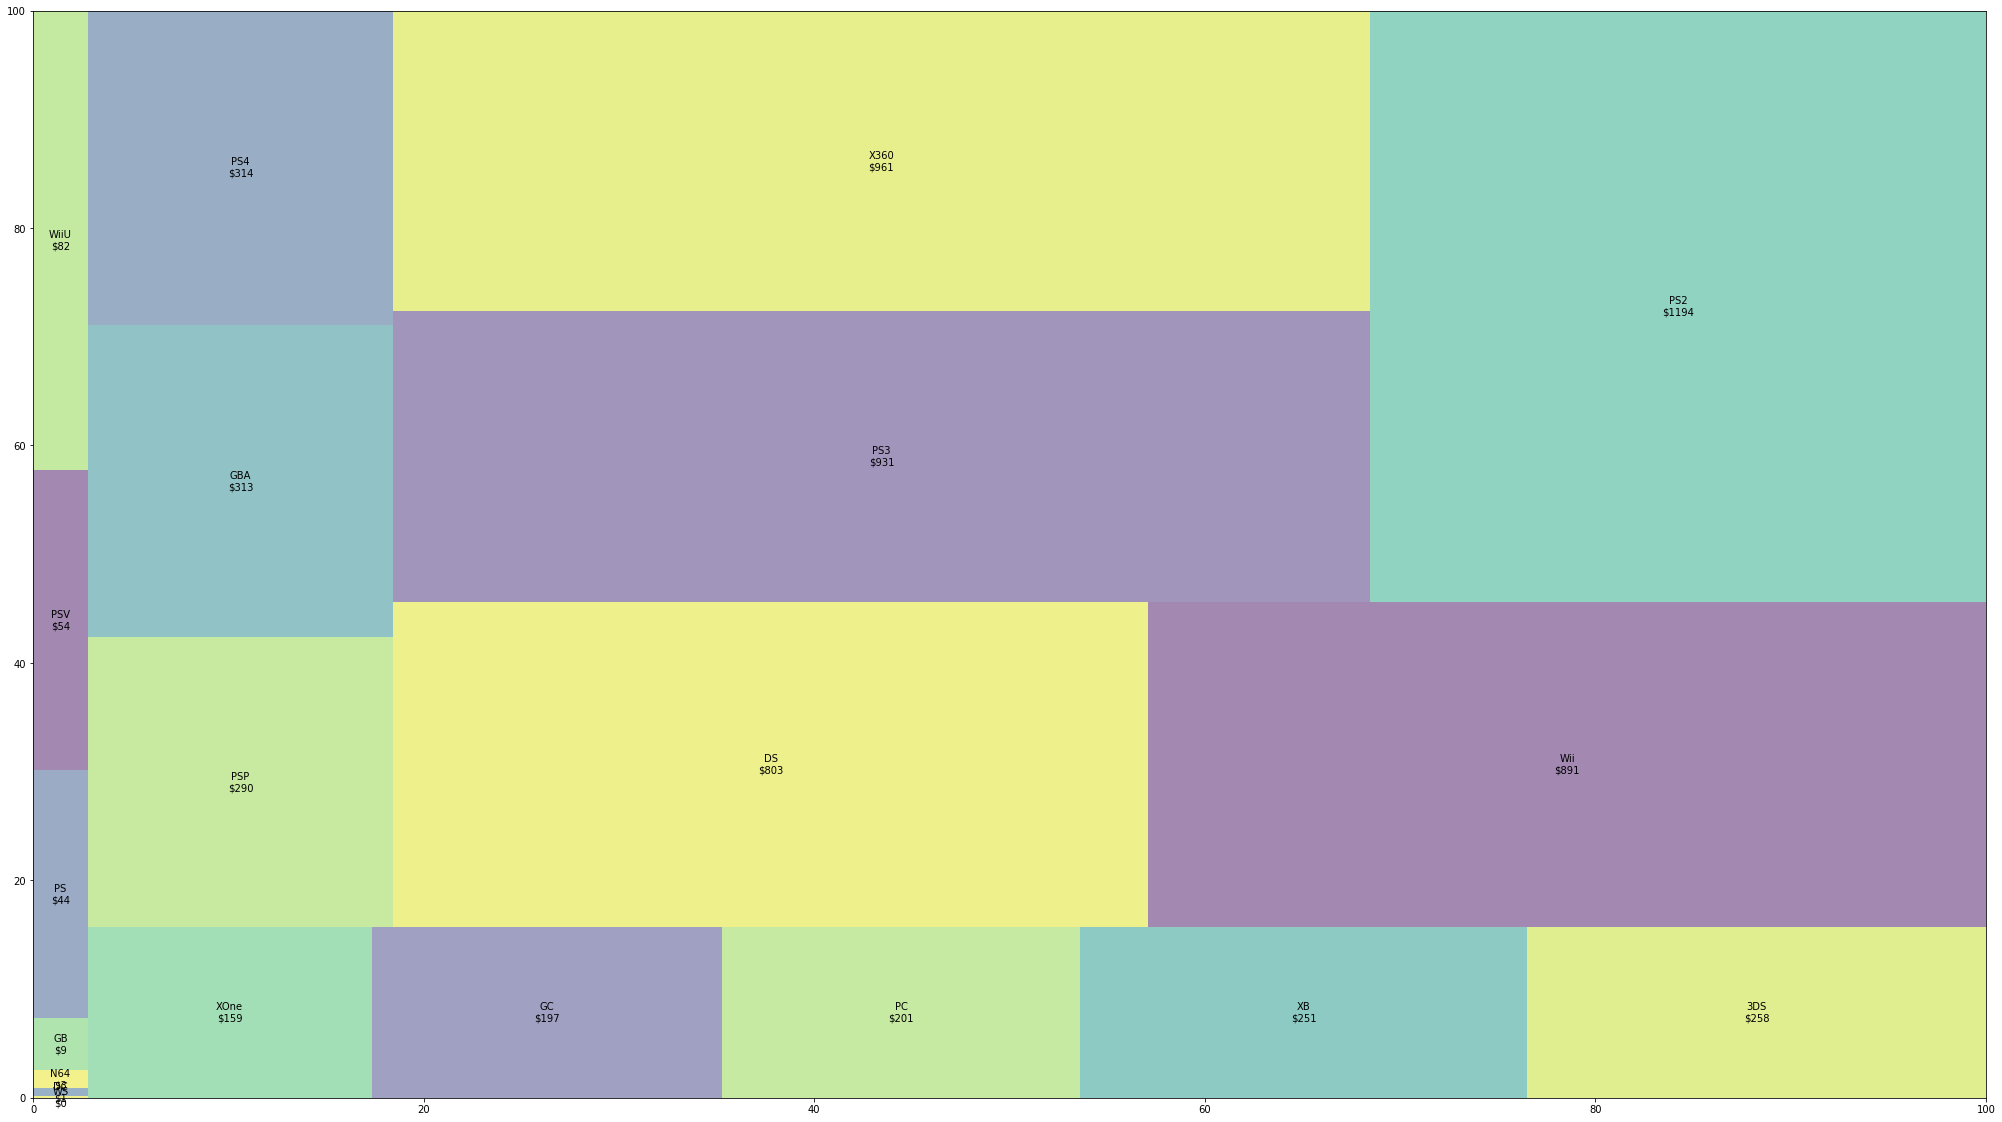

In [24]:
games_new = games[games.year_of_release > 2000]
games_tree = games_new[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
display(games_tree.tail())
sizes = games_tree.total_sales.values.tolist()
labels = games_tree.apply(lambda x: str(x[0]) +'\n' + '$' + str(round(x[1])), axis=1)
plt.figure(figsize=(35,20))
squarify.plot(sizes = sizes, label = labels, alpha=0.5)
plt.show()

<div style="border:solid  #vbd300; 4px; padding: 20px">

    We took the games released after 2001, grouped them by platforms and found the most profitable ones. The top-5 platforms make up more than a half of the market. 
    
</div>

# Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [25]:
games_new_pivot = pd.pivot_table(games_new, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

In [26]:
dynamics = games_new_pivot - games_new_pivot.shift(+1)


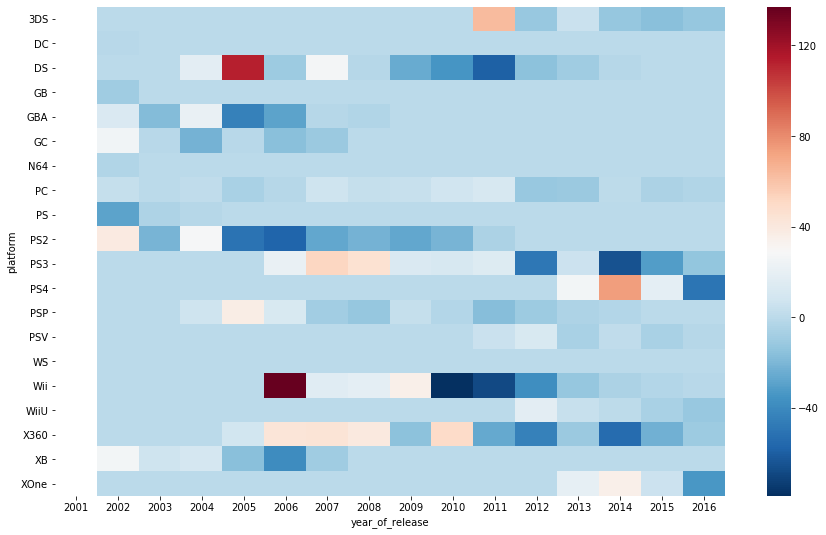

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(dynamics.T, cmap = "RdBu_r")


<div style="border:solid #vbd300; 4px; padding: 20px">
We keep working only with relatively new platforms. Let's have a look at the dynamics in sales for each platform. 
    
So, it seems there are a few platforms that have zero dynamics for a few last years in a raw, and before that, they had negative one. The second group of platforms just have negative dynamics for a few years in a row. Also, there are only two platforms released recently -- XOne and PS4 -- that have negative dynamics too, but most likely they will be bringing money for the next a couple of years. Our main hope is that Nintendo is going to present a new game console.
</div>


# The Box plot for the global sales of each game, broken down by platform

In [28]:
games_boxplot = games_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
display(games_boxplot)
ordered_platforms = games_boxplot.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
136,XB,2008,0.18
137,XOne,2013,18.96
138,XOne,2014,54.07
139,XOne,2015,60.14


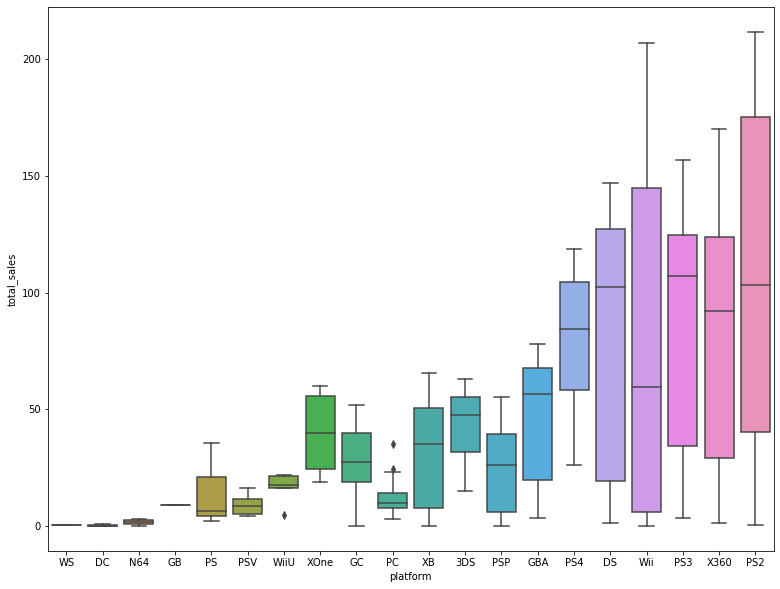

In [29]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data = games_boxplot, order = ordered_platforms)


<div style="border:solid #vbd300; 4px; padding: 20px">

 We built a box plot for global sales for each platform to look at how our data vary here. 
 We see that average sales could be easily split by categories: the pink ones, the green ones, and the brown ones. For instance, that means 'pink' platforms have more or less the same average and range. Only Wee has less average that the rest ones, although it has a bigger range and outliers showing that it was as profitable as PS2 in its best year.
    
    
</div>

# How user and professional reviews affect sales for a particular popular platform 


In [30]:
top_platforms_reviews_and_sales = games[games['platform'].isin(sales_by_platform.platform.values.tolist()[-9:])]
print(top_platforms_reviews_and_sales['total_sales'].corr(top_platforms_reviews_and_sales['critic_score']))
print(top_platforms_reviews_and_sales['total_sales'].corr(top_platforms_reviews_and_sales['user_score']))


0.248077249251437
0.10086364036696302


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


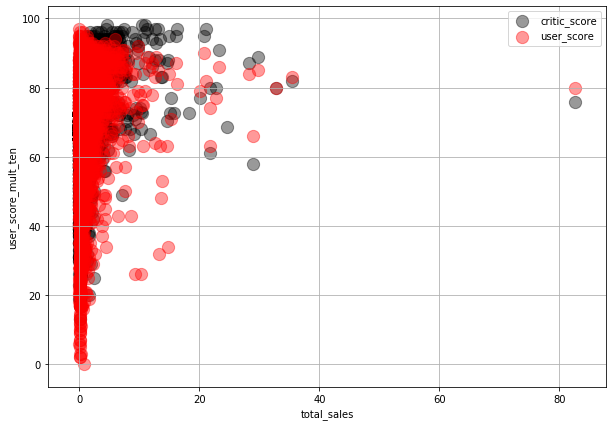

In [31]:
top_platforms_reviews_and_sales['user_score_mult_ten'] = top_platforms_reviews_and_sales['user_score']*10
#print(top_platforms_reviews_and_sales['platform'].unique())
#color_dict = {'Wii':'red',
             #'DS': 'orange',
             #'X360': 'yellow',
             #'PS3': 'green',
              #'PS2': 'blue',
              #'GBA': 'purple',
              #'PS4': 'grey',
              #'PS': 'pink',
              #'PSP': 'black'}


ax = top_platforms_reviews_and_sales.plot(kind='scatter', x='total_sales', y='critic_score', figsize = (10,7), s = 150, c = 'black', grid =True, alpha=0.4,
                                         label='critic_score', legend=True)

top_platforms_reviews_and_sales.plot(kind='scatter', x='total_sales', y='user_score_mult_ten', figsize = (10,7), s = 150, c = 'red', grid =True, alpha=0.4,
                                         label='user_score', legend=True, ax=ax)
plt.show()



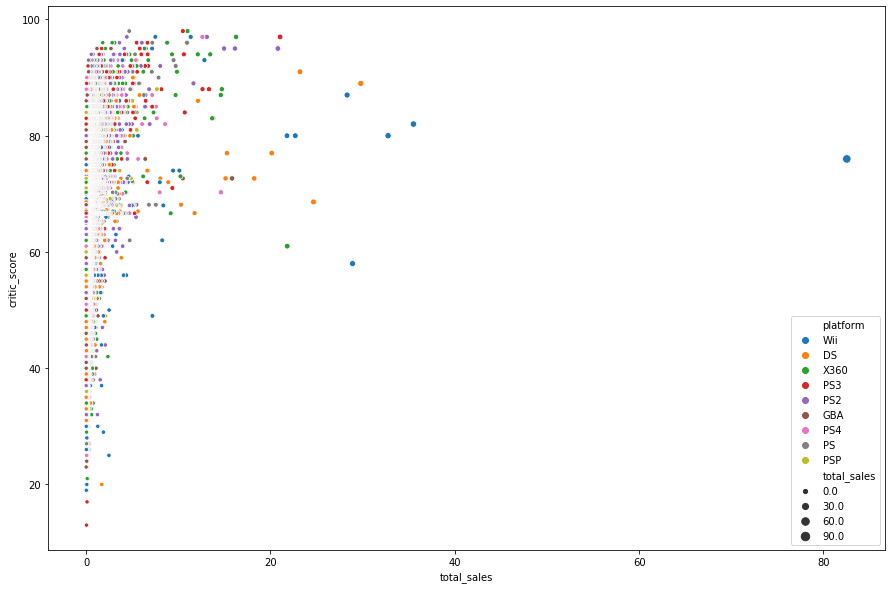

In [32]:
sales_corr_cs =sns.scatterplot(x="total_sales", y="critic_score",
              hue="platform", size ="total_sales",  
              data=top_platforms_reviews_and_sales)
sales_corr_cs.figure.set_size_inches(15,10)



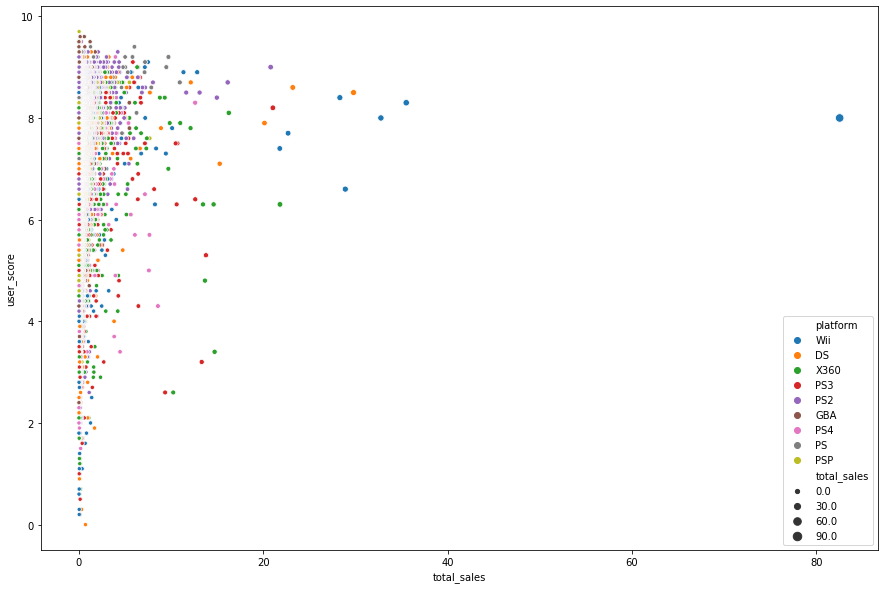

In [33]:
sales_corr_us =sns.scatterplot(x="total_sales", y="user_score",
              hue="platform",size ="total_sales",
              data=top_platforms_reviews_and_sales)
sales_corr_us.figure.set_size_inches(15,10)


<div style="border:solid #vbd300; 4px; padding: 20px">
Here we found out the correlation between the user and professional reviews and sales for popular platforms. Both correlate positively, critics' predictions are more precise. We see that particular games of the Wii platform have huge sales and relatively low scores. Another interesting fact is that many games for PS2 have the greatest scores and relatively low sales(however, the total sales for this platform are still the best). 
</div>

# The distribution of games by genre

In [34]:
games_genres_pivot = pd.pivot_table(games_new, index='genre', columns='platform', values='total_sales', 
                                    aggfunc='sum', fill_value=0)
#print(games_genres_pivot)

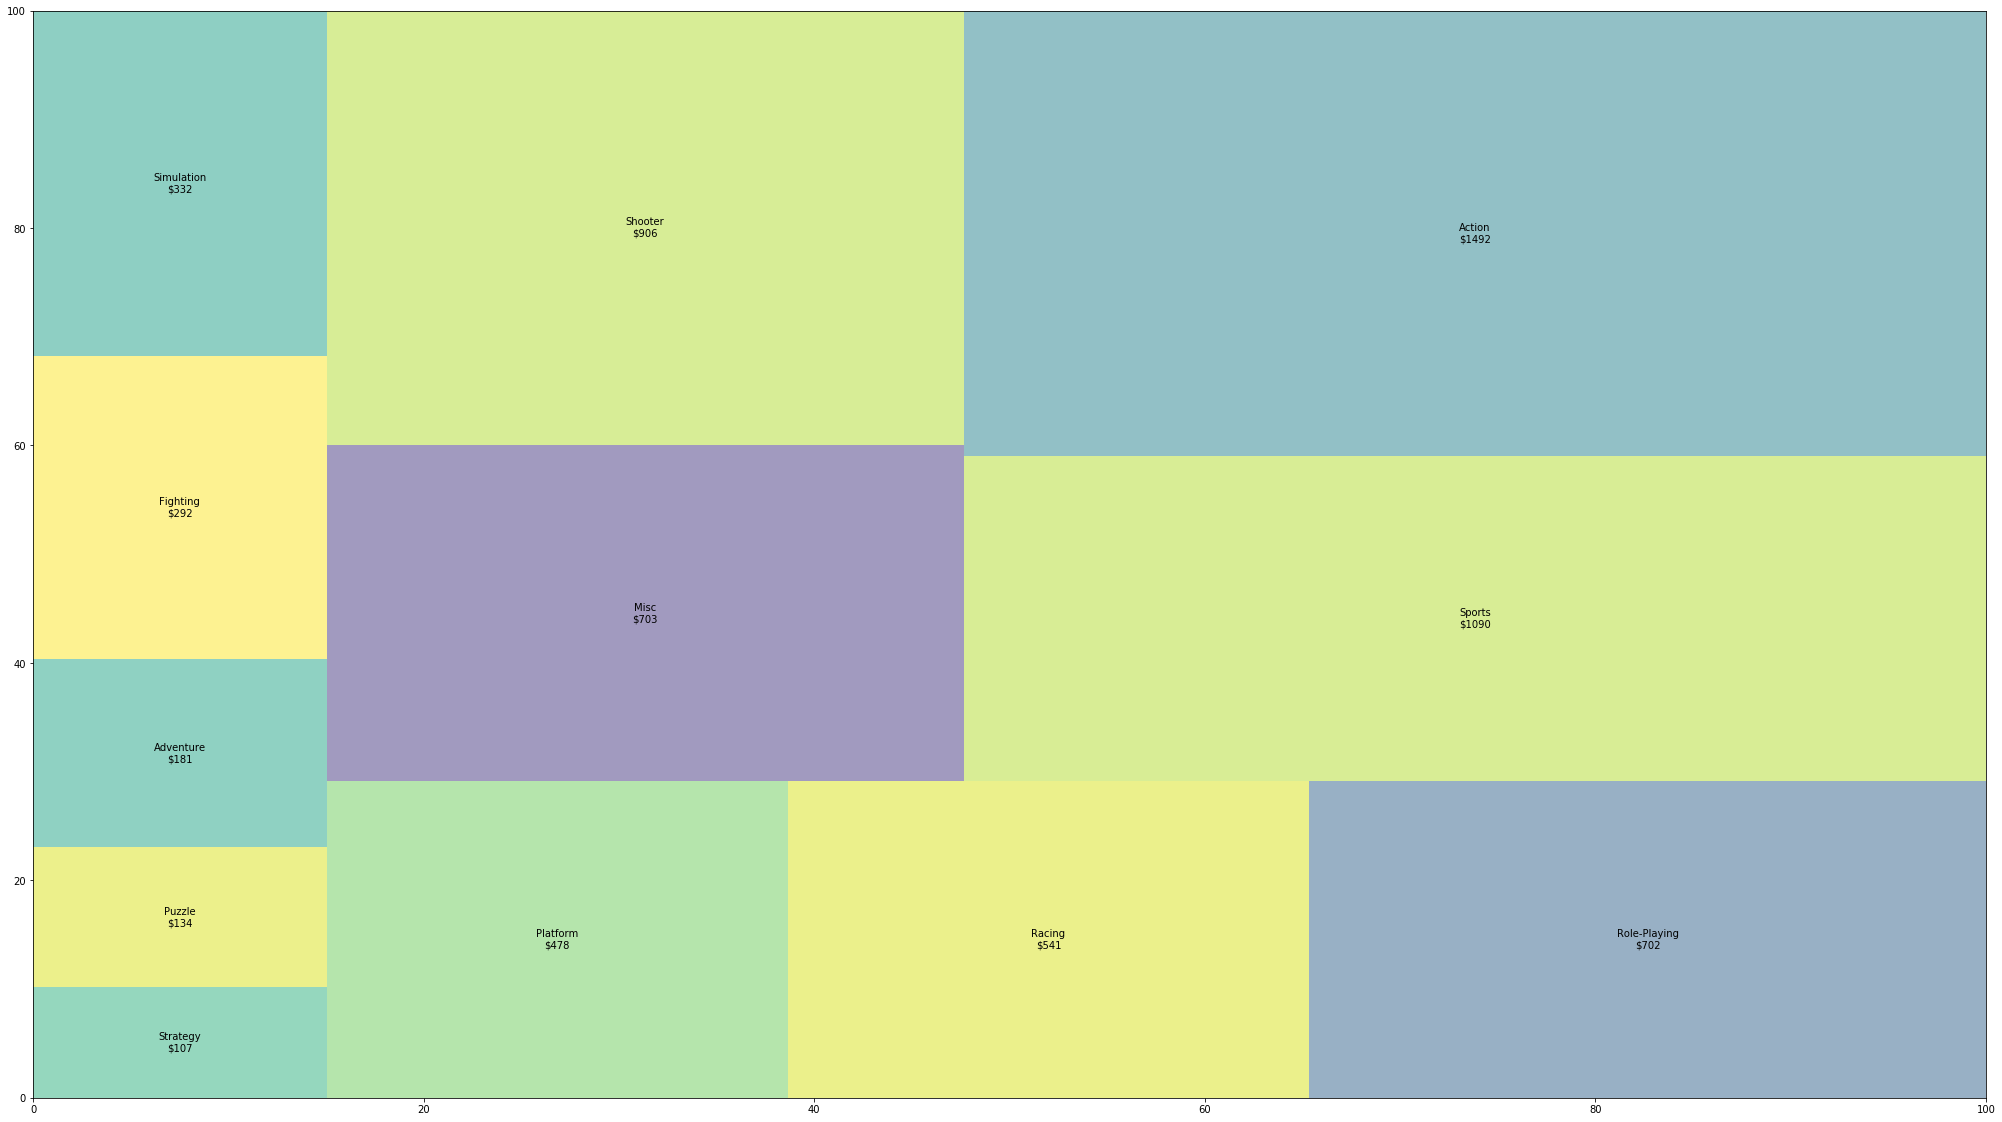

In [35]:
genres_tree = games_new[['genre', 'total_sales']].groupby('genre').sum().sort_values(by='total_sales').reset_index()
sizes = genres_tree.total_sales.values.tolist()
labels = genres_tree.apply(lambda x: str(x[0]) +'\n' + '$' + str(round(x[1])), axis=1)
plt.figure(figsize=(35,20))
squarify.plot(sizes = sizes, label = labels, alpha=0.5)
plt.show()

<div style="border:solid #vbd300; 4px; padding: 20px">

On this treemap, we showed the most profitable genres over the world, there are a few of them for each region below.     
</div>

## Review

```diff
+ Very good third part. All the checkpoints were done correctly.
```

You've used a lot of types of plots and colors. It is great while you're studying, but in real-world projects better to use the same style throughout the project.

---

# Create a user profile for each region


,na_sales
platform,
X360,595.74
PS2,556.84
Wii,486.87
PS3,390.13
DS,380.31


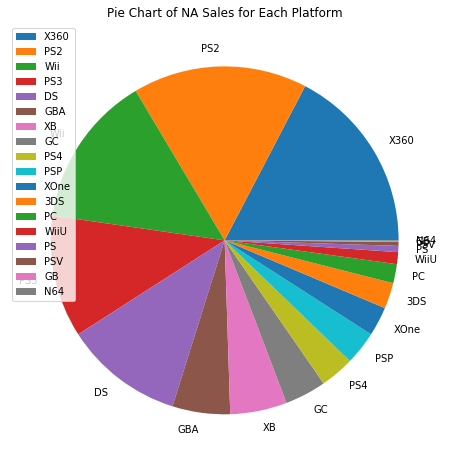

In [36]:
games_platforms_na_pivot = pd.pivot_table(games_new, index='platform', values='na_sales', 
                                    aggfunc='sum', fill_value=0).sort_values(by='na_sales', ascending=False)
display(games_platforms_na_pivot.head())
games_platforms_na_pivot.plot(kind='pie', subplots=True, figsize=(8,8))
plt.title("Pie Chart of NA Sales for Each Platform")
plt.ylabel("")
plt.show()


,genre,na_sales
0,Action,734.48
1,Sports,566.64
2,Shooter,491.23
3,Misc,358.13
4,Role-Playing,275.10


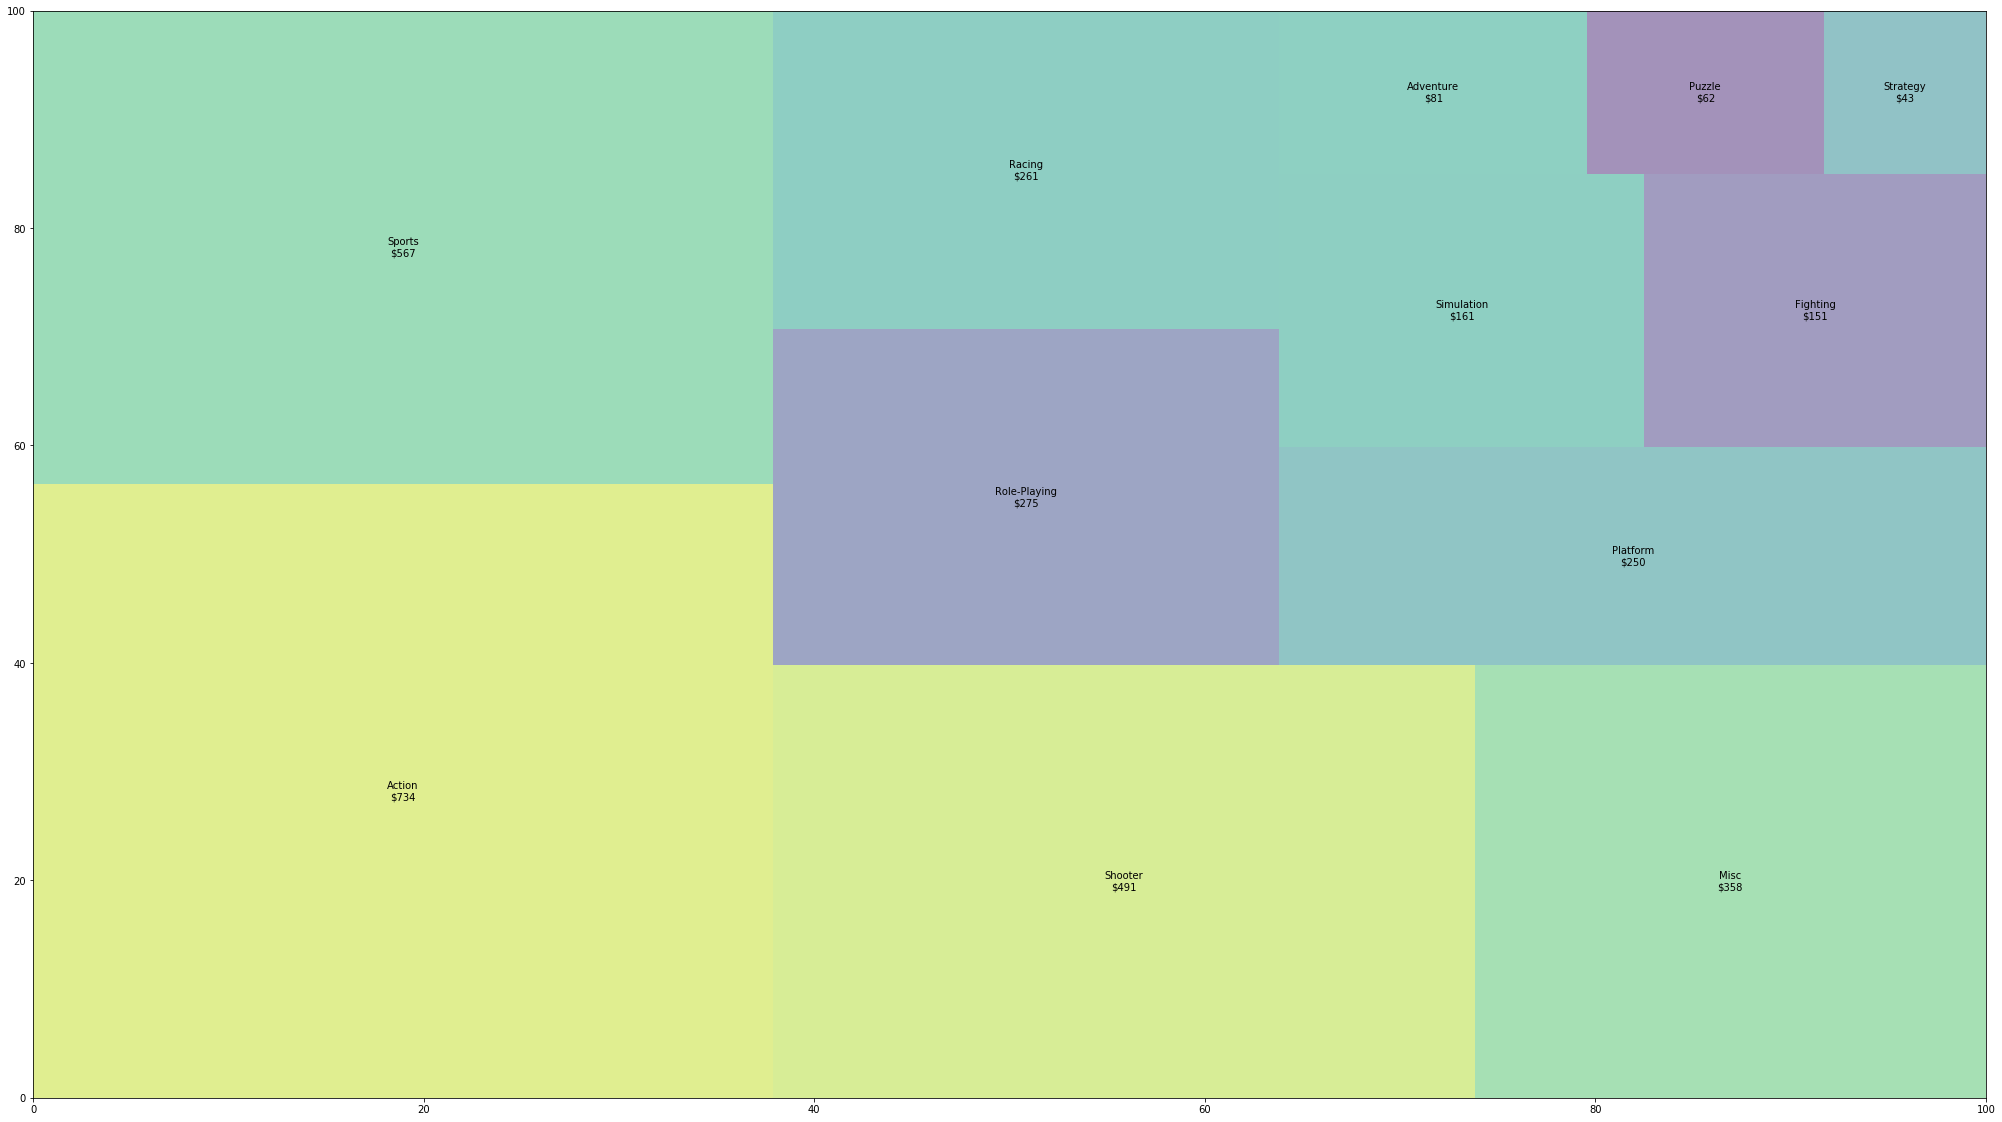

In [37]:
genres_tree_na = games_new[['genre', 'na_sales']].groupby('genre').sum().sort_values(by='na_sales', ascending=False).reset_index()
display(genres_tree_na.head())
sizes = genres_tree_na.na_sales.values.tolist()
labels = genres_tree_na.apply(lambda x: str(x[0]) +'\n' + '$' + str(round(x[1])), axis=1)
plt.figure(figsize=(35,20))
squarify.plot(sizes = sizes, label = labels, alpha=0.5)
plt.show()

,eu_sales
platform,
PS3,327.21
PS2,321.99
X360,268.32
Wii,258.32
DS,188.41


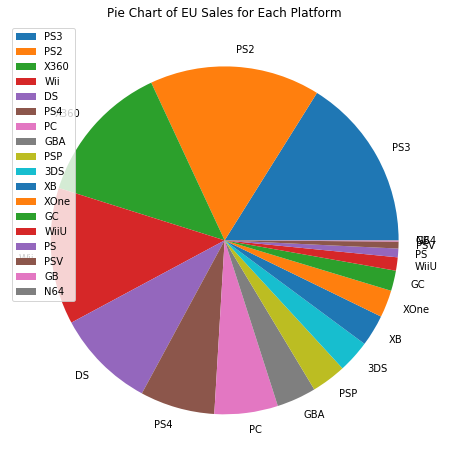

In [38]:
games_platforms_eu_pivot = pd.pivot_table(games_new, index='platform', values='eu_sales', 
                                    aggfunc='sum', fill_value=0).sort_values(by='eu_sales', ascending=False)
display(games_platforms_eu_pivot.head())

games_platforms_eu_pivot.plot(kind='pie', subplots=True, figsize=(8,8))
plt.title("Pie Chart of EU Sales for Each Platform")
plt.ylabel("")
plt.show()


     genre  eu_sales
0   Action    455.74
1   Sports    329.81
2  Shooter    291.85
3     Misc    191.80
4   Racing    185.52


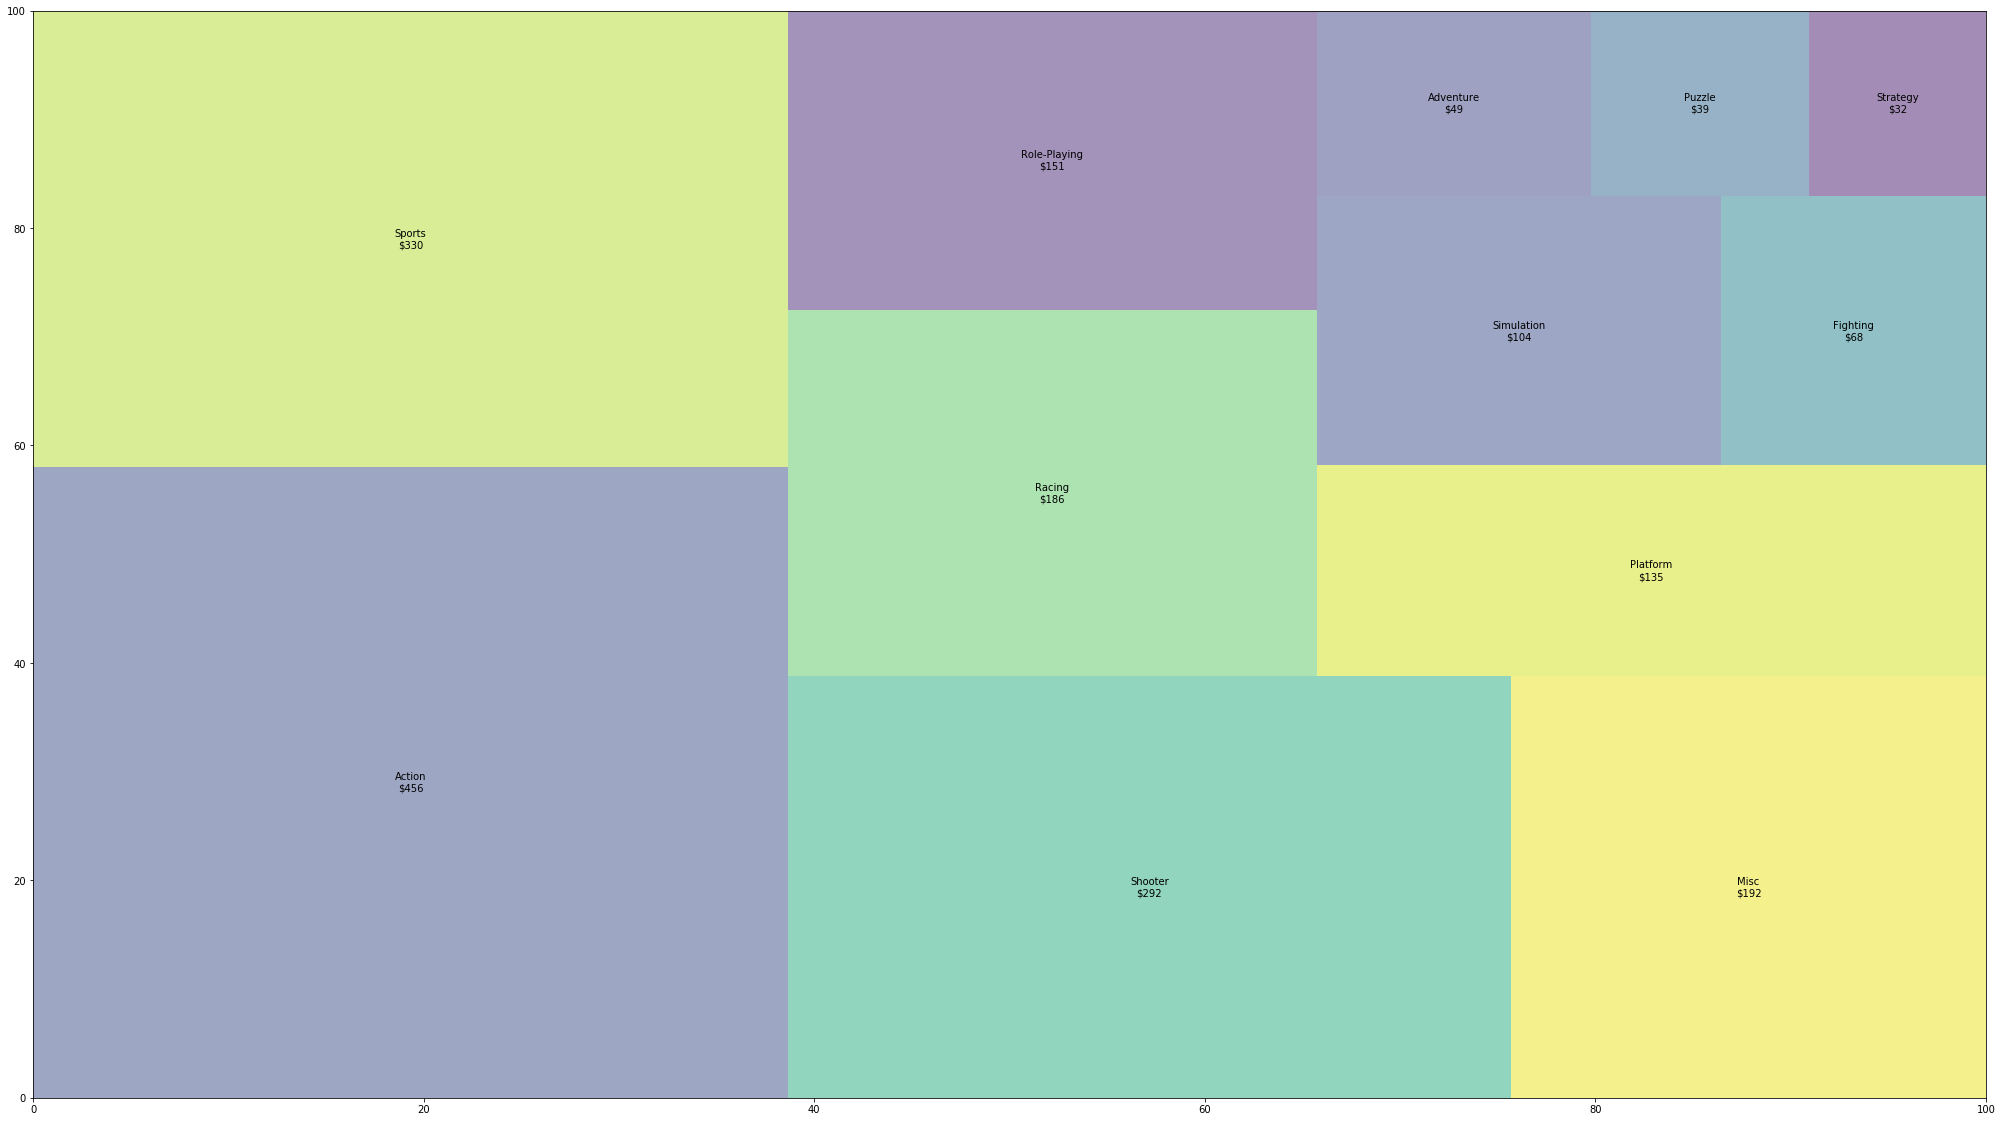

In [39]:
genres_tree_eu = games_new[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by='eu_sales', ascending=False).reset_index()
print(genres_tree_eu.head())
sizes = genres_tree_eu.eu_sales.values.tolist()
labels = genres_tree_eu.apply(lambda x: str(x[0]) +'\n' + '$' + str(round(x[1])), axis=1)
plt.figure(figsize=(35,20))
squarify.plot(sizes = sizes, label = labels, alpha=0.5)
plt.show()

,jp_sales
platform,
DS,175.00
PS2,128.67
3DS,100.62
PS3,79.41
PSP,75.88


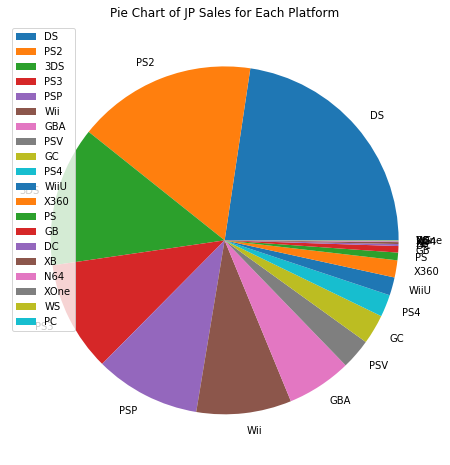

In [40]:
games_platforms_jp_pivot = pd.pivot_table(games_new, index='platform', values='jp_sales', 
                                    aggfunc='sum', fill_value=0).sort_values(by='jp_sales', ascending=False)
display(games_platforms_jp_pivot.head())
games_platforms_jp_pivot.plot(kind='pie', subplots=True, figsize=(8,8))
plt.title("Pie Chart of JP Sales for Each Platform")
plt.ylabel("")
plt.show()

          genre  jp_sales
0  Role-Playing    225.91
1        Action    128.49
2          Misc     82.66
3        Sports     69.52
4      Platform     52.71


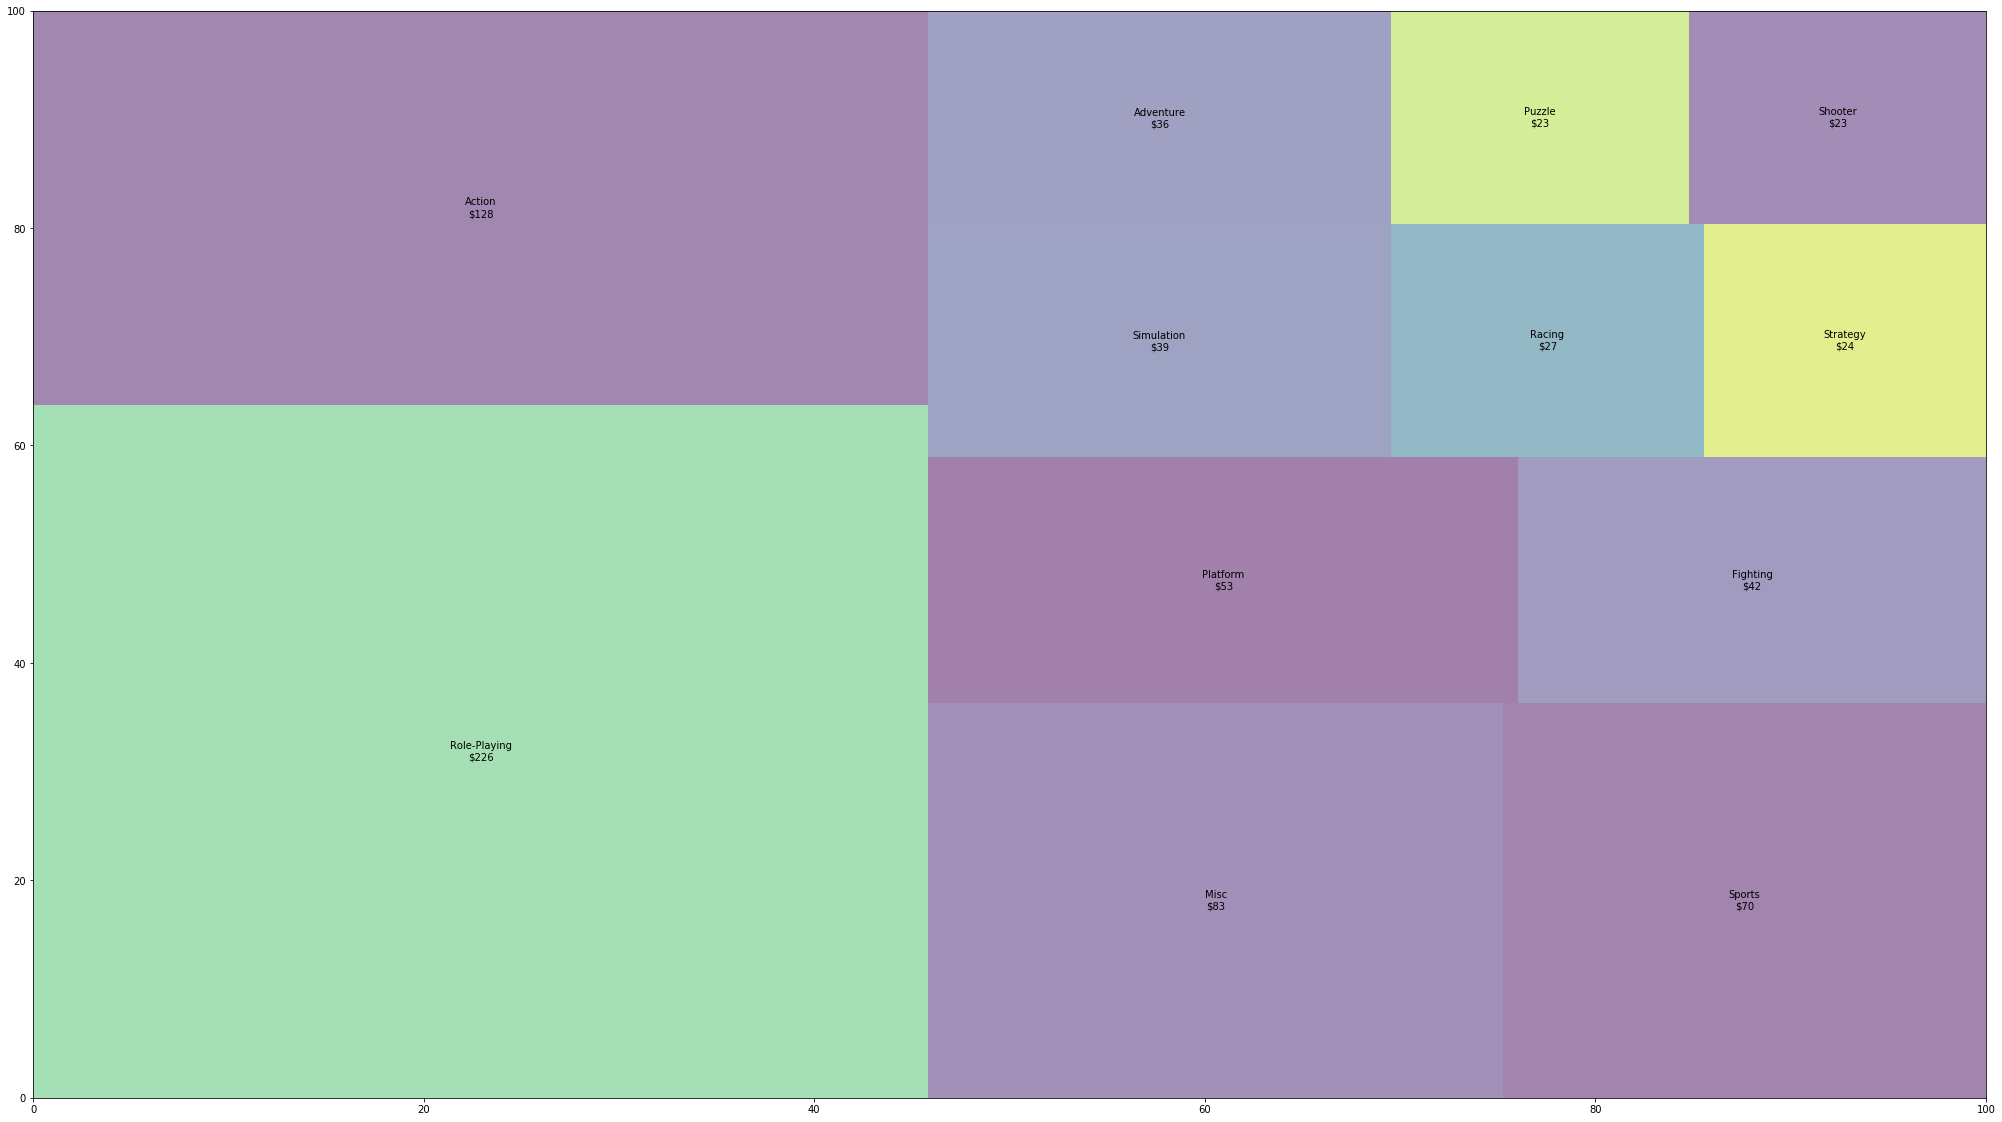

In [41]:
genres_tree_jp = games_new[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by='jp_sales', ascending=False).reset_index()
print(genres_tree_jp.head())
sizes = genres_tree_jp.jp_sales.values.tolist()
labels = genres_tree_jp.apply(lambda x: str(x[0]) +'\n' + '$' + str(round(x[1])), axis=1)
plt.figure(figsize=(35,20))
squarify.plot(sizes = sizes, label = labels, alpha=0.5)
plt.show()

In [42]:
games_esrb_pivot = pd.pivot_table(games_new, index='rating', values=['na_sales','eu_sales', 'jp_sales'], 
                                    aggfunc='sum', fill_value=0)
display(games_esrb_pivot)
games_esrb_pivot['jp_sales'] = games_esrb_pivot['jp_sales'] / games_esrb_pivot['jp_sales'].sum()
games_esrb_pivot['eu_sales'] = games_esrb_pivot['eu_sales'] / games_esrb_pivot['eu_sales'].sum()
games_esrb_pivot['na_sales'] = games_esrb_pivot['na_sales'] / games_esrb_pivot['na_sales'].sum()

display(games_esrb_pivot)

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,675.38,187.27,1225.21
E10+,183.33,40.20,345.50
EC,0.11,0.00,1.53
M,470.66,57.16,725.87
RP,323.63,365.79,446.71
T,379.12,122.63,689.03


,eu_sales,jp_sales,na_sales
rating,,,
AO,0.000300,0.000000,0.000367
E,0.332235,0.242248,0.356673
E10+,0.090184,0.052002,0.100579
EC,0.000054,0.000000,0.000445
M,0.231528,0.073941,0.211309
RP,0.159201,0.473178,0.130042
T,0.186498,0.158631,0.200585


<div style="border:solid purple; 4px; padding: 20px">
We found out the top five platforms for each region (NA, EU, JP):

NA: X360, PS2, Wii, PS3, DS

EU: PS3, PS2, X360, Wii, DS
    
JP: DS, PS2, 3DS, PS3, PSP


The top five genres for each region:

NA: Action, Sports, Shooter, Misc, Role-Playing 

EU: Action, Sports, Shooter, Misc, Racing 
    
JP: Role-Playing, Action, Misc, Sports, Platform 
    
So, we clearly see that customers' preferenses in Europe and Amerika have lots in common while Japan is different. We see only japanise consols there(in North America the first place takes X360). 
    
We do not have enough data to answer if ESRB ratings strongly affect sales. We can see that Adults Only and Mature sales equal zero, but we should keep in mind that most of the games released in Japan do not have a confirmed rating, they have RP. Although, it obviously that such games are much popular than EC and E10+ ones (everywhere). 
    
</div>

## Review

```diff
+ Good section. All questions were answered.
```

---

# Testing the hypotheses


In [45]:
#games_us_xbox_pc = pd.pivot_table(games, index='platform', values='user_score')
#print(games_us_xbox_pc)
#games_us_ac_sp = pd.pivot_table(games, index='genre', values='user_score')
#print(games_us_ac_sp)
full_data = games[games['user_score'].notna()]

In [46]:
from scipy import stats as st

In [47]:
xboxone_users = full_data.query('platform == "XOne"')
pc_users = full_data.query('platform == "PC"')

sample_1 = xboxone_users['user_score']

sample_2 = pc_users['user_score']

alpha = .05 

results = st.ttest_ind(
        sample_1, 
        sample_2,
        equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  4.5385802963771776e-06
We reject the null hypothesis


In [48]:
action_us = full_data.query('genre == "Action"')
sports_us = full_data.query('genre == "Sports"')

sample_11 = action_us['user_score']

sample_22 = sports_us['user_score']

alpha1 = .05 

results = st.ttest_ind(
        sample_11, 
        sample_22,
        equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha1):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.07370217419278534
We can't reject the null hypothesis


<div style="border:solid #vbd300; 4px; padding: 20px">

We checked the hypothesis that average user ratings of the Xbox One and PC platforms are the same (the null hypothesis). The p-value is 0.0000045385802963771776, so ratings are different.     

Also, we tested samples with user ratings for the Action and Sports genres. Here we can't affirm that their averages are significantly different for sure, although the p-value is  0.07370217419278534. We may consider changing our alpha threshold. 
    
    
</div>

## Review

Good, but you have to formulate explicitly null and alternative hypotheses

---

# Resume

<div style="border:solid #vbd300; 4px; padding: 20px">
In this project, we got familiar with data and found out many facts and dependancies. 
    
    - We calculated total sales for all games.
    - Saw how many games were released every year.We learned that there is almost the same number of released games in 2016 as in 2001, but most likely that now developers concentrate on high-quality potentially profitable products.
    - We found top-9 platforms with positive standard scores and looked at their sales dynamics to estimate an average platform lifetime and figure out what platforms are still 'alive' (PS4 and XOne). Then, we found out top platforms for recent years and looked at their dynamics too.
    - We built a box plot for global sales for each platform to look at how our data vary there.
    - We estimate how critics' and users' scores predict sales for games (and platforms).
    - We calculated how profitable each genre.
    - We made a a user profile for each region describing users' preferences in gernres and platforms in each region.
    - We tested 2 (4) hypotheses for 

</div>